### Classfication Task Practise Problems

#### Import Libraries

In [64]:
import pandas                  as pd
import numpy                   as np
import keras
from   keras.layers            import Dense, Dropout, BatchNormalization, Activation
from   sklearn.model_selection import train_test_split
from   keras.models            import Sequential
from   keras.callbacks         import EarlyStopping
from   sklearn.metrics         import confusion_matrix, classification_report, accuracy_score, log_loss, hinge_loss
from sklearn.preprocessing     import StandardScaler
from imblearn.over_sampling    import SMOTE

##### Import Data

In [2]:
df = pd.read_csv('dataset_classification.csv')

df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,...,saldo_medio_var13_medio_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var33_hace3,saldo_medio_var33_ult3,saldo_medio_var44_hace3,var38,TARGET_Classification
0,142882,2,55,30.0,17.73,17.73,0.00,0.0,17.73,17.73,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59375.97,1
1,116073,2,26,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117951.42,0
2,40727,2,31,180.0,1051.86,1145.91,0.00,0.0,1051.86,1145.91,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81164.61,0
3,96753,89,55,0.0,1353.03,1998.81,990.75,0.0,362.28,362.28,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137912.85,0
4,105319,2,24,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40407.66,0


In [4]:
df['TARGET_Classification'].value_counts()

0    17997
1     1808
Name: TARGET_Classification, dtype: int64

In [8]:
sum(df.isna().sum()>0)

0

In [9]:
df.drop('ID', axis = 1, inplace = True)

In [10]:
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,...,saldo_medio_var13_medio_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var33_hace3,saldo_medio_var33_ult3,saldo_medio_var44_hace3,var38,TARGET_Classification
0,2,55,30.0,17.73,17.73,0.00,0.0,17.73,17.73,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59375.97,1
1,2,26,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117951.42,0
2,2,31,180.0,1051.86,1145.91,0.00,0.0,1051.86,1145.91,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81164.61,0
3,89,55,0.0,1353.03,1998.81,990.75,0.0,362.28,362.28,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137912.85,0
4,2,24,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40407.66,0


In [11]:
X = df.iloc[:, 1:-1].values
y = df['TARGET_Classification'].values

#### Train Test Split

In [32]:
X[0].shape

(212,)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify = y)

#### Standard_Scaler

In [68]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.fit_transform(X_test)

In [130]:
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)

In [65]:
def metrics(y_true,y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('Log Loss:\n', log_loss(y_true, y_pred))
    print('Hinge Loss:\n', hinge_loss(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

In [135]:
def deep_model_algo(activation, nodes, opti, dropout = False):
    model = Sequential()
    for i in range(len(nodes)): #Add input layer and hidden layer
        if i == 0:
            model.add(Dense(nodes[i], input_dim = 212, kernel_initializer = 'he_normal'))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            if dropout:
                model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes[i]))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            if dropout:
                model.add(Dropout(0.3))
            
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    
    model.add(Dense(1))
    print(model)
    #Compile
    model.compile(optimizer = opti, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [69]:
#Model 1
model = deep_model_algo(activation='relu', nodes = [300, 250, 200, 100, 20], opti = 'Adam')

In [70]:
model.fit(X_train, y_train, batch_size = 256, epochs = 100, validation_split = 0.3)

Epoch 1/100
38/38 [==============================] - 6s 38ms/step - loss: 1.3452 - accuracy: 0.7488 - val_loss: 0.3379 - val_accuracy: 0.9072
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.7794 - accuracy: 0.8850 - val_loss: 0.3336 - val_accuracy: 0.9072
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.6115 - accuracy: 0.8881 - val_loss: 0.3460 - val_accuracy: 0.9072
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.6055 - accuracy: 0.8766 - val_loss: 0.3389 - val_accuracy: 0.9072
Epoch 5/100
38/38 [==============================] - 1s 26ms/step - loss: 0.6300 - accuracy: 0.8780 - val_loss: 0.3287 - val_accuracy: 0.9072
Epoch 6/100
38/38 [==============================] - 1s 21ms/step - loss: 0.5177 - accuracy: 0.8960 - val_loss: 0.3279 - val_accuracy: 0.9072
Epoch 7/100
38/38 [==============================] - 1s 19ms/step - loss: 0.5252 - accuracy: 0.8928 - val_loss: 0.3276 - val_accuracy: 0.9072
Epoch 

38/38 [==============================] - 1s 15ms/step - loss: 0.2822 - accuracy: 0.9176 - val_loss: 0.3136 - val_accuracy: 0.9086
Epoch 59/100
38/38 [==============================] - 1s 15ms/step - loss: 0.3187 - accuracy: 0.9033 - val_loss: 0.3178 - val_accuracy: 0.9086
Epoch 60/100
38/38 [==============================] - 1s 17ms/step - loss: 0.3068 - accuracy: 0.9041 - val_loss: 0.3187 - val_accuracy: 0.9086
Epoch 61/100
38/38 [==============================] - 1s 14ms/step - loss: 0.2903 - accuracy: 0.9146 - val_loss: 0.3186 - val_accuracy: 0.9086
Epoch 62/100
38/38 [==============================] - 1s 14ms/step - loss: 0.3275 - accuracy: 0.9073 - val_loss: 0.3193 - val_accuracy: 0.9086
Epoch 63/100
38/38 [==============================] - 1s 14ms/step - loss: 0.3189 - accuracy: 0.9040 - val_loss: 0.3116 - val_accuracy: 0.9086
Epoch 64/100
38/38 [==============================] - 1s 14ms/step - loss: 0.3198 - accuracy: 0.9064 - val_loss: 0.3086 - val_accuracy: 0.9086
Epoch 65/100

In [71]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

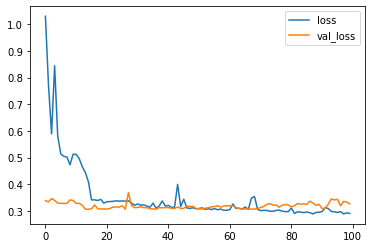

In [72]:
loss[['loss', 'val_loss']].plot()

In [73]:
train_pred = model.predict_classes(X_train)
test_pred = model.predict_classes (X_test)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [74]:
metrics(y_train, train_pred)
metrics(y_test, test_pred)

Confusion Matrix:
 [[12597     0]
 [ 1266     0]]
Log Loss:
 3.154157896267542
Hinge Loss:
 1.0


Accuracy Score:
 0.9086777753732959


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12597
           1       0.00      0.00      0.00      1266

    accuracy                           0.91     13863
   macro avg       0.45      0.50      0.48     13863
weighted avg       0.83      0.91      0.87     13863

Confusion Matrix:
 [[5400    0]
 [ 542    0]]
Log Loss:
 3.150457220808077
Hinge Loss:
 1.0


Accuracy Score:
 0.9087849209020532


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      5400
           1       0.00      0.00      0.00       542

    accuracy                           0.91      5942
   macro avg       0.45      0.50      0.48      5942
weighted avg       0.83      0.91      0.87      5942



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

In [75]:
#Model 2
model = deep_model_algo(activation='relu', nodes = [300, 250, 200, 100, 20], opti = 'Adam')

In [76]:
model.fit(X_train, y_train, batch_size = 256, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
55/55 [==============================] - 6s 30ms/step - loss: 1.3704 - accuracy: 0.8715 - val_loss: 0.3432 - val_accuracy: 0.9066
Epoch 2/100
55/55 [==============================] - 1s 16ms/step - loss: 0.6544 - accuracy: 0.8923 - val_loss: 0.3468 - val_accuracy: 0.9066
Epoch 3/100
55/55 [==============================] - 1s 17ms/step - loss: 0.4550 - accuracy: 0.9031 - val_loss: 0.3153 - val_accuracy: 0.9088
Epoch 4/100
55/55 [==============================] - 1s 17ms/step - loss: 0.4084 - accuracy: 0.8834 - val_loss: 0.3298 - val_accuracy: 0.9088
Epoch 5/100
55/55 [==============================] - 1s 17ms/step - loss: 0.3739 - accuracy: 0.8970 - val_loss: 0.3144 - val_accuracy: 0.9088
Epoch 6/100
55/55 [==============================] - 1s 16ms/step - loss: 0.3463 - accuracy: 0.9070 - val_loss: 0.3149 - val_accuracy: 0.9084
Epoch 7/100
55/55 [==============================] - 1s 14ms/step - loss: 0.3308 - accuracy: 0.9117 - val_loss: 0.3149 - val_accuracy: 0.9084
Epoch 

55/55 [==============================] - 1s 16ms/step - loss: 0.2984 - accuracy: 0.9124 - val_loss: 0.3205 - val_accuracy: 0.9081
Epoch 59/100
55/55 [==============================] - 1s 14ms/step - loss: 0.2951 - accuracy: 0.9108 - val_loss: 0.3232 - val_accuracy: 0.9088
Epoch 60/100
55/55 [==============================] - 1s 14ms/step - loss: 0.3020 - accuracy: 0.9093 - val_loss: 0.3252 - val_accuracy: 0.9088
Epoch 61/100
55/55 [==============================] - 1s 14ms/step - loss: 0.3128 - accuracy: 0.9106 - val_loss: 0.3101 - val_accuracy: 0.9088
Epoch 62/100
55/55 [==============================] - 1s 15ms/step - loss: 0.3120 - accuracy: 0.9058 - val_loss: 0.3117 - val_accuracy: 0.9088
Epoch 63/100
55/55 [==============================] - 1s 14ms/step - loss: 0.3064 - accuracy: 0.9087 - val_loss: 0.3157 - val_accuracy: 0.9088
Epoch 64/100
55/55 [==============================] - 1s 15ms/step - loss: 0.2998 - accuracy: 0.9111 - val_loss: 0.3183 - val_accuracy: 0.9088
Epoch 65/100

In [77]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.098414,0.868715,0.343181,0.906597
1,0.623822,0.895044,0.346849,0.906597
2,0.404374,0.905215,0.315293,0.908785
3,0.435694,0.871024,0.329832,0.908785
4,0.365599,0.900527,0.314369,0.908785


<AxesSubplot:>

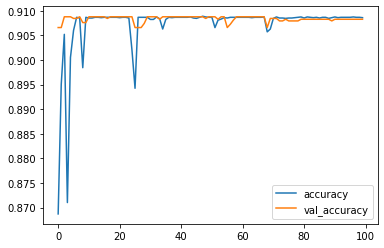

In [78]:
loss[['accuracy', 'val_accuracy']].plot()

In [79]:
train_pred = model.predict_classes(X_train)
test_pred = model.predict_classes (X_test)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
metrics(y_train, train_pred)
metrics(y_test, test_pred)

Confusion Matrix:
 [[12593     4]
 [ 1265     1]]
Log Loss:
 3.1616324347927134
Hinge Loss:
 1.0002164033758927


Accuracy Score:
 0.9084613719974032


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12597
           1       0.20      0.00      0.00      1266

    accuracy                           0.91     13863
   macro avg       0.55      0.50      0.48     13863
weighted avg       0.84      0.91      0.87     13863

Confusion Matrix:
 [[5397    3]
 [ 542    0]]
Log Loss:
 3.1678955796059602
Hinge Loss:
 1.0005048805116123


Accuracy Score:
 0.908280040390441


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      5400
           1       0.00      0.00      0.00       542

    accuracy                           0.91      5942
   macro avg       0.45      0.50      0.48      5942
weighted avg       0.83      0.91      0.87      594

In [82]:
#Standard scaler
model.fit(X_train_sc, y_train, batch_size = 256, epochs = 100, validation_data = (X_test_sc, y_test))

Epoch 1/100
55/55 [==============================] - 1s 19ms/step - loss: 0.3608 - accuracy: 0.9042 - val_loss: 0.3084 - val_accuracy: 0.9088
Epoch 2/100
55/55 [==============================] - 1s 13ms/step - loss: 0.2823 - accuracy: 0.9072 - val_loss: 0.3054 - val_accuracy: 0.9088
Epoch 3/100
55/55 [==============================] - 1s 15ms/step - loss: 0.2731 - accuracy: 0.9089 - val_loss: 0.3059 - val_accuracy: 0.9088
Epoch 4/100
55/55 [==============================] - 1s 17ms/step - loss: 0.2709 - accuracy: 0.9081 - val_loss: 0.3067 - val_accuracy: 0.9088
Epoch 5/100
55/55 [==============================] - 1s 17ms/step - loss: 0.2830 - accuracy: 0.9090 - val_loss: 0.3154 - val_accuracy: 0.9088
Epoch 6/100
55/55 [==============================] - 1s 17ms/step - loss: 0.2623 - accuracy: 0.9090 - val_loss: 0.3091 - val_accuracy: 0.9088
Epoch 7/100
55/55 [==============================] - 1s 15ms/step - loss: 0.2551 - accuracy: 0.9087 - val_loss: 0.3060 - val_accuracy: 0.9088
Epoch 

55/55 [==============================] - 1s 15ms/step - loss: 0.2755 - accuracy: 0.9099 - val_loss: 0.3021 - val_accuracy: 0.9088
Epoch 59/100
55/55 [==============================] - 1s 14ms/step - loss: 0.2739 - accuracy: 0.9094 - val_loss: 0.2913 - val_accuracy: 0.9088
Epoch 60/100
55/55 [==============================] - 1s 14ms/step - loss: 0.2621 - accuracy: 0.9088 - val_loss: 0.2883 - val_accuracy: 0.9088
Epoch 61/100
55/55 [==============================] - 1s 14ms/step - loss: 0.2503 - accuracy: 0.9089 - val_loss: 0.2902 - val_accuracy: 0.9088
Epoch 62/100
55/55 [==============================] - 1s 13ms/step - loss: 0.2876 - accuracy: 0.9031 - val_loss: 0.9111 - val_accuracy: 0.8573
Epoch 63/100
55/55 [==============================] - 1s 14ms/step - loss: 0.6494 - accuracy: 0.8608 - val_loss: 0.7796 - val_accuracy: 0.8613
Epoch 64/100
55/55 [==============================] - 1s 15ms/step - loss: 0.5708 - accuracy: 0.8767 - val_loss: 0.5193 - val_accuracy: 0.8834
Epoch 65/100

In [83]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.360823,0.904205,0.308446,0.908785
1,0.282265,0.907235,0.305414,0.908785
2,0.273148,0.908894,0.305906,0.908785
3,0.270873,0.908101,0.306668,0.908785
4,0.283018,0.909038,0.315374,0.908785


<AxesSubplot:>

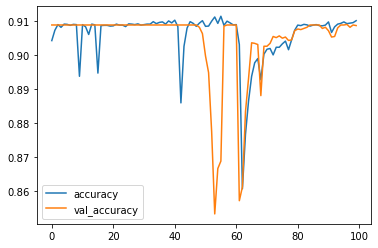

In [84]:
loss[['accuracy', 'val_accuracy']].plot()

In [85]:
train_pred = model.predict_classes(X_train_sc)
test_pred = model.predict_classes (X_test_sc)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [104]:
train_pred1 = (model.predict(X_train_sc)>0.3)
test_pred1 = (model.predict(X_test_sc)>0.3)

In [106]:
metrics(y_train, train_pred1.astype(int))

metrics(y_test, test_pred1.astype(int))

Confusion Matrix:
 [[11840   757]
 [  735   531]]
Log Loss:
 3.7172660806796083
Hinge Loss:
 1.0163023876505808


Accuracy Score:
 0.8923753877227152


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     12597
           1       0.41      0.42      0.42      1266

    accuracy                           0.89     13863
   macro avg       0.68      0.68      0.68     13863
weighted avg       0.89      0.89      0.89     13863

Confusion Matrix:
 [[5041  359]
 [ 321  221]]
Log Loss:
 3.95265146482947
Hinge Loss:
 1.0232245035341636


Accuracy Score:
 0.8855604173678896


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      5400
           1       0.38      0.41      0.39       542

    accuracy                           0.89      5942
   macro avg       0.66      0.67      0.67      5942
weighted avg       0.89      0.89      0.89      5942

#### SMote

In [108]:
sm = SMOTE()

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [111]:
y_train.shape, y_train_sm.shape

((13863,), (25194,))

In [112]:
model.fit(X_train_sm, y_train_sm, batch_size = 256, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
99/99 [==============================] - 2s 15ms/step - loss: 0.8550 - accuracy: 0.5418 - val_loss: 0.6530 - val_accuracy: 0.9081
Epoch 2/100
99/99 [==============================] - 2s 16ms/step - loss: 0.6722 - accuracy: 0.6081 - val_loss: 0.6235 - val_accuracy: 0.9088
Epoch 3/100
99/99 [==============================] - 2s 15ms/step - loss: 0.6338 - accuracy: 0.6292 - val_loss: 0.5286 - val_accuracy: 0.9083
Epoch 4/100
99/99 [==============================] - 2s 15ms/step - loss: 0.6219 - accuracy: 0.6348 - val_loss: 0.4693 - val_accuracy: 0.9081
Epoch 5/100
99/99 [==============================] - 1s 13ms/step - loss: 0.6212 - accuracy: 0.6359 - val_loss: 0.4913 - val_accuracy: 0.9083
Epoch 6/100
99/99 [==============================] - 2s 20ms/step - loss: 0.6146 - accuracy: 0.6376 - val_loss: 0.4388 - val_accuracy: 0.9083
Epoch 7/100
99/99 [==============================] - 2s 23ms/step - loss: 0.6667 - accuracy: 0.6360 - val_loss: 0.4830 - val_accuracy: 0.9066
Epoch 

99/99 [==============================] - 1s 15ms/step - loss: 0.6318 - accuracy: 0.6303 - val_loss: 0.4597 - val_accuracy: 0.9071
Epoch 59/100
99/99 [==============================] - 2s 15ms/step - loss: 0.6382 - accuracy: 0.6166 - val_loss: 0.4269 - val_accuracy: 0.9071
Epoch 60/100
99/99 [==============================] - 2s 18ms/step - loss: 0.5872 - accuracy: 0.6839 - val_loss: 0.4019 - val_accuracy: 0.9071
Epoch 61/100
99/99 [==============================] - 1s 14ms/step - loss: 0.5764 - accuracy: 0.6821 - val_loss: 0.3583 - val_accuracy: 0.9083
Epoch 62/100
99/99 [==============================] - 2s 16ms/step - loss: 0.5716 - accuracy: 0.6884 - val_loss: 0.3281 - val_accuracy: 0.9088
Epoch 63/100
99/99 [==============================] - 1s 14ms/step - loss: 0.5694 - accuracy: 0.6895 - val_loss: 0.3345 - val_accuracy: 0.9088
Epoch 64/100
99/99 [==============================] - 2s 15ms/step - loss: 0.5832 - accuracy: 0.6891 - val_loss: 0.3738 - val_accuracy: 0.9088
Epoch 65/100

<AxesSubplot:>

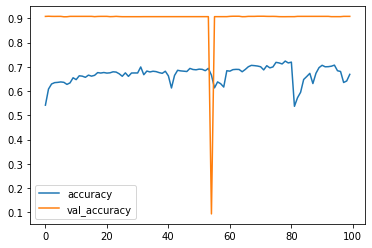

In [113]:
loss = pd.DataFrame(model.history.history)
loss.head()
loss[['accuracy', 'val_accuracy']].plot()

In [116]:
train_pred = model.predict_classes(X_train_sm)
test_pred = model.predict_classes (X_test)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [118]:
metrics(y_train_sm, train_pred)
print('-'*10)
metrics(y_test, test_pred)

Confusion Matrix:
 [[12593     4]
 [12584    13]]
Log Loss:
 17.257050109451665
Hinge Loss:
 0.9996427720885925


Accuracy Score:
 0.5003572279114075


Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     12597
           1       0.76      0.00      0.00     12597

    accuracy                           0.50     25194
   macro avg       0.63      0.50      0.33     25194
weighted avg       0.63      0.50      0.33     25194

----------
Confusion Matrix:
 [[5397    3]
 [ 542    0]]
Log Loss:
 3.1678955796059602
Hinge Loss:
 1.0005048805116123


Accuracy Score:
 0.908280040390441


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      5400
           1       0.00      0.00      0.00       542

    accuracy                           0.91      5942
   macro avg       0.45      0.50      0.48      5942
weighted avg       0.83      0.91      0.

In [120]:
model.get_weights()

[array([[ 8.07130858e-02, -4.08378124e+00,  1.40024519e+00, ...,
          1.46293056e+00, -2.22410113e-02,  4.13088547e-03],
        [ 6.49903417e-02,  4.08176363e-01, -6.43304810e-02, ...,
          1.92980200e-01, -2.49974579e-02, -1.24365808e-02],
        [ 2.21984744e-01, -1.10519305e-01,  8.39557052e-02, ...,
         -8.87129828e-02,  1.77008986e-01,  7.20781535e-02],
        ...,
        [ 2.46597067e-01, -4.23270129e-02,  1.06757022e-01, ...,
         -1.31196260e-01,  2.32982174e-01,  9.80226845e-02],
        [ 3.28228265e-01,  1.35040715e-01,  4.54494879e-02, ...,
         -1.20638967e-01,  3.83030400e-02, -3.60658253e-03],
        [-1.49625922e-02, -5.31921126e-02,  7.34481961e-02, ...,
          2.24616323e-02, -1.32424548e-01, -1.40045226e-01]], dtype=float32),
 array([-5.30715566e-04, -5.96914615e-05, -9.71819281e-06,  5.48711723e-05,
         8.71518743e-04, -3.90925823e-04,  2.32416089e-03,  4.05418221e-03,
         4.20193013e-04,  4.40607779e-04,  2.36618653e-04,  1.

In [121]:
#Model 2
model = deep_model_algo(activation='elu', nodes = [300, 550, 500, 300, 200, 150, 100, 50], opti = 'Adam')

In [123]:
model.fit(X_train, y_train, batch_size = 256, epochs = 300, validation_data = (X_test, y_test))

Epoch 1/300
55/55 [==============================] - 2s 38ms/step - loss: 1.1499 - accuracy: 0.8472 - val_loss: 0.3377 - val_accuracy: 0.9069
Epoch 2/300
55/55 [==============================] - 2s 36ms/step - loss: 0.9261 - accuracy: 0.8756 - val_loss: 0.3566 - val_accuracy: 0.9069
Epoch 3/300
55/55 [==============================] - 2s 35ms/step - loss: 0.8763 - accuracy: 0.8797 - val_loss: 0.3987 - val_accuracy: 0.9066
Epoch 4/300
55/55 [==============================] - 2s 35ms/step - loss: 0.7965 - accuracy: 0.8758 - val_loss: 1.4403 - val_accuracy: 0.9066
Epoch 5/300
55/55 [==============================] - 2s 35ms/step - loss: 1.8019 - accuracy: 0.8111 - val_loss: 1.4403 - val_accuracy: 0.9066
Epoch 6/300
55/55 [==============================] - 2s 36ms/step - loss: 0.6257 - accuracy: 0.8609 - val_loss: 1.4352 - val_accuracy: 0.9069
Epoch 7/300
55/55 [==============================] - 2s 35ms/step - loss: 0.5749 - accuracy: 0.8815 - val_loss: 1.4403 - val_accuracy: 0.9066
Epoch 

55/55 [==============================] - 2s 35ms/step - loss: 0.3075 - accuracy: 0.9086 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 59/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3038 - accuracy: 0.9086 - val_loss: 0.3936 - val_accuracy: 0.9088
Epoch 60/300
55/55 [==============================] - 2s 34ms/step - loss: 0.4741 - accuracy: 0.8755 - val_loss: 0.3136 - val_accuracy: 0.9088
Epoch 61/300
55/55 [==============================] - 2s 35ms/step - loss: 0.6051 - accuracy: 0.8935 - val_loss: 0.3184 - val_accuracy: 0.9088
Epoch 62/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3378 - accuracy: 0.9080 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 63/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3126 - accuracy: 0.9086 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 64/300
55/55 [==============================] - 2s 37ms/step - loss: 0.3113 - accuracy: 0.9087 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 65/300

55/55 [==============================] - 2s 44ms/step - loss: 0.3243 - accuracy: 0.9067 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 116/300
55/55 [==============================] - 2s 43ms/step - loss: 0.3351 - accuracy: 0.9071 - val_loss: 1.4045 - val_accuracy: 0.9083
Epoch 117/300
55/55 [==============================] - 2s 36ms/step - loss: 0.3242 - accuracy: 0.9072 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 118/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3197 - accuracy: 0.9069 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 119/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3233 - accuracy: 0.9073 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 120/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3279 - accuracy: 0.9072 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 121/300
55/55 [==============================] - 2s 36ms/step - loss: 0.3318 - accuracy: 0.9069 - val_loss: 1.4070 - val_accuracy: 0.9088
Epoch 

Epoch 172/300
55/55 [==============================] - 2s 34ms/step - loss: 0.3305 - accuracy: 0.9079 - val_loss: 0.3469 - val_accuracy: 0.9088
Epoch 173/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3117 - accuracy: 0.9082 - val_loss: 0.3938 - val_accuracy: 0.9088
Epoch 174/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3102 - accuracy: 0.9087 - val_loss: 0.3758 - val_accuracy: 0.9088
Epoch 175/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3112 - accuracy: 0.9087 - val_loss: 0.4726 - val_accuracy: 0.9088
Epoch 176/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3076 - accuracy: 0.9087 - val_loss: 0.4392 - val_accuracy: 0.9088
Epoch 177/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3045 - accuracy: 0.9087 - val_loss: 0.3281 - val_accuracy: 0.9088
Epoch 178/300
55/55 [==============================] - 2s 39ms/step - loss: 0.3062 - accuracy: 0.9087 - val_loss: 0.3467 - val_accuracy:

Epoch 229/300
55/55 [==============================] - 2s 34ms/step - loss: 0.3079 - accuracy: 0.9087 - val_loss: 0.3136 - val_accuracy: 0.9088
Epoch 230/300
55/55 [==============================] - 2s 37ms/step - loss: 0.3084 - accuracy: 0.9087 - val_loss: 0.3127 - val_accuracy: 0.9088
Epoch 231/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3106 - accuracy: 0.9087 - val_loss: 0.3135 - val_accuracy: 0.9088
Epoch 232/300
55/55 [==============================] - 2s 34ms/step - loss: 0.3069 - accuracy: 0.9087 - val_loss: 0.3134 - val_accuracy: 0.9088
Epoch 233/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3074 - accuracy: 0.9087 - val_loss: 0.3138 - val_accuracy: 0.9088
Epoch 234/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3105 - accuracy: 0.9087 - val_loss: 0.3123 - val_accuracy: 0.9088
Epoch 235/300
55/55 [==============================] - 2s 34ms/step - loss: 0.3067 - accuracy: 0.9087 - val_loss: 0.3119 - val_accuracy:

Epoch 286/300
55/55 [==============================] - 2s 38ms/step - loss: 0.3045 - accuracy: 0.9087 - val_loss: 0.3096 - val_accuracy: 0.9088
Epoch 287/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3042 - accuracy: 0.9087 - val_loss: 0.3098 - val_accuracy: 0.9088
Epoch 288/300
55/55 [==============================] - 2s 39ms/step - loss: 0.3052 - accuracy: 0.9087 - val_loss: 0.3107 - val_accuracy: 0.9088
Epoch 289/300
55/55 [==============================] - 2s 44ms/step - loss: 0.3038 - accuracy: 0.9087 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 290/300
55/55 [==============================] - 2s 37ms/step - loss: 0.3058 - accuracy: 0.9087 - val_loss: 0.3099 - val_accuracy: 0.9088
Epoch 291/300
55/55 [==============================] - 2s 36ms/step - loss: 0.3028 - accuracy: 0.9087 - val_loss: 0.3106 - val_accuracy: 0.9088
Epoch 292/300
55/55 [==============================] - 2s 37ms/step - loss: 0.3027 - accuracy: 0.9087 - val_loss: 0.3097 - val_accuracy:

<AxesSubplot:>

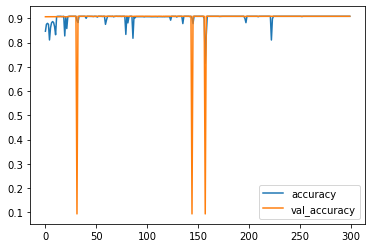

In [124]:
loss = pd.DataFrame(model.history.history)
loss.head()
loss[['accuracy', 'val_accuracy']].plot()

In [125]:
train_pred = model.predict_classes(X_train)
test_pred = model.predict_classes (X_test)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [127]:
metrics(y_train, train_pred)
print('-'*10)
metrics(y_test, test_pred)

Confusion Matrix:
 [[12597     0]
 [ 1266     0]]
Log Loss:
 3.154157896267542
Hinge Loss:
 1.0


Accuracy Score:
 0.9086777753732959


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12597
           1       0.00      0.00      0.00      1266

    accuracy                           0.91     13863
   macro avg       0.45      0.50      0.48     13863
weighted avg       0.83      0.91      0.87     13863

----------
Confusion Matrix:
 [[5400    0]
 [ 542    0]]
Log Loss:
 3.150457220808077
Hinge Loss:
 1.0


Accuracy Score:
 0.9087849209020532


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      5400
           1       0.00      0.00      0.00       542

    accuracy                           0.91      5942
   macro avg       0.45      0.50      0.48      5942
weighted avg       0.83      0.91      0.87      5942



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

In [131]:
model.fit(X_train, y_train, batch_size = 256, epochs = 300, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3004 - accuracy: 0.9087 - val_loss: 0.3110 - val_accuracy: 0.9088
Epoch 2/300
55/55 [==============================] - 2s 36ms/step - loss: 0.3004 - accuracy: 0.9087 - val_loss: 0.3159 - val_accuracy: 0.9088
Epoch 3/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3039 - accuracy: 0.9087 - val_loss: 0.3094 - val_accuracy: 0.9088
Epoch 4/300
55/55 [==============================] - 2s 36ms/step - loss: 0.3008 - accuracy: 0.9087 - val_loss: 0.3126 - val_accuracy: 0.9088
Epoch 5/300
55/55 [==============================] - 2s 35ms/step - loss: 0.2976 - accuracy: 0.9087 - val_loss: 0.3115 - val_accuracy: 0.9088
Epoch 6/300
55/55 [==============================] - 2s 35ms/step - loss: 0.2958 - accuracy: 0.9087 - val_loss: 0.3225 - val_accuracy: 0.9088
Epoch 7/300
55/55 [==============================] - 2s 35ms/step - loss: 0.2983 - accuracy: 0.9087 - val_loss: 0.3236 - val_accuracy: 0.9088
Epoch 

55/55 [==============================] - 2s 36ms/step - loss: 0.3567 - accuracy: 0.9087 - val_loss: 0.3107 - val_accuracy: 0.9088
Epoch 59/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3184 - accuracy: 0.9087 - val_loss: 0.3099 - val_accuracy: 0.9088
Epoch 60/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3088 - accuracy: 0.9087 - val_loss: 0.3105 - val_accuracy: 0.9088
Epoch 61/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3201 - accuracy: 0.9087 - val_loss: 0.3111 - val_accuracy: 0.9088
Epoch 62/300
55/55 [==============================] - 2s 33ms/step - loss: 0.3110 - accuracy: 0.9087 - val_loss: 0.3097 - val_accuracy: 0.9088
Epoch 63/300
55/55 [==============================] - 2s 39ms/step - loss: 0.3156 - accuracy: 0.9087 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 64/300
55/55 [==============================] - 2s 34ms/step - loss: 0.3054 - accuracy: 0.9087 - val_loss: 0.3100 - val_accuracy: 0.9088
Epoch 65/300

In [132]:
train_pred = model.predict_classes(X_train)
test_pred = model.predict_classes (X_test)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#### Kernel Initialiser

In [136]:
#Model 2
model = deep_model_algo(activation='relu', nodes = [300, 550, 500, 300, 200, 150, 100, 50], opti = 'Adam')

In [137]:
model.fit(X_train, y_train, batch_size = 256, epochs = 300, validation_data = (X_test, y_test))

Epoch 1/300
55/55 [==============================] - 8s 52ms/step - loss: 0.9784 - accuracy: 0.8556 - val_loss: 0.3099 - val_accuracy: 0.9088
Epoch 2/300
55/55 [==============================] - 2s 34ms/step - loss: 0.6300 - accuracy: 0.8937 - val_loss: 0.3154 - val_accuracy: 0.9088
Epoch 3/300
55/55 [==============================] - 2s 35ms/step - loss: 0.6332 - accuracy: 0.9093 - val_loss: 0.3097 - val_accuracy: 0.9088
Epoch 4/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3721 - accuracy: 0.9058 - val_loss: 0.3109 - val_accuracy: 0.9088
Epoch 5/300
55/55 [==============================] - 2s 34ms/step - loss: 0.3379 - accuracy: 0.9103 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 6/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3348 - accuracy: 0.9078 - val_loss: 0.3109 - val_accuracy: 0.9088
Epoch 7/300
55/55 [==============================] - 2s 35ms/step - loss: 0.3295 - accuracy: 0.9099 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 

55/55 [==============================] - 2s 34ms/step - loss: 0.3009 - accuracy: 0.9079 - val_loss: 0.3102 - val_accuracy: 0.9088
Epoch 59/300
55/55 [==============================] - 2s 34ms/step - loss: 0.2915 - accuracy: 0.9099 - val_loss: 0.3113 - val_accuracy: 0.9088
Epoch 60/300
55/55 [==============================] - 2s 34ms/step - loss: 0.2893 - accuracy: 0.9097 - val_loss: 0.3233 - val_accuracy: 0.9088
Epoch 61/300
55/55 [==============================] - 2s 38ms/step - loss: 0.3131 - accuracy: 0.9040 - val_loss: 0.3242 - val_accuracy: 0.9088
Epoch 62/300
55/55 [==============================] - 2s 34ms/step - loss: 0.3029 - accuracy: 0.9072 - val_loss: 0.3197 - val_accuracy: 0.9088
Epoch 63/300
55/55 [==============================] - 2s 40ms/step - loss: 0.2931 - accuracy: 0.9080 - val_loss: 0.3182 - val_accuracy: 0.9088
Epoch 64/300
55/55 [==============================] - 2s 36ms/step - loss: 0.2996 - accuracy: 0.9099 - val_loss: 0.3235 - val_accuracy: 0.9088
Epoch 65/300

55/55 [==============================] - 2s 35ms/step - loss: 0.2795 - accuracy: 0.9087 - val_loss: 0.3177 - val_accuracy: 0.9088
Epoch 116/300
55/55 [==============================] - 2s 33ms/step - loss: 0.2768 - accuracy: 0.9090 - val_loss: 0.3261 - val_accuracy: 0.9088
Epoch 117/300
55/55 [==============================] - 2s 33ms/step - loss: 0.2784 - accuracy: 0.9083 - val_loss: 0.3144 - val_accuracy: 0.9088
Epoch 118/300
55/55 [==============================] - 2s 33ms/step - loss: 0.2895 - accuracy: 0.9072 - val_loss: 0.3205 - val_accuracy: 0.9088
Epoch 119/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2792 - accuracy: 0.9101 - val_loss: 0.3204 - val_accuracy: 0.9088
Epoch 120/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2812 - accuracy: 0.9069 - val_loss: 0.3375 - val_accuracy: 0.9088
Epoch 121/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2684 - accuracy: 0.9116 - val_loss: 0.3271 - val_accuracy: 0.9088
Epoch 

Epoch 172/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2767 - accuracy: 0.9103 - val_loss: 0.3176 - val_accuracy: 0.9088
Epoch 173/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2992 - accuracy: 0.9089 - val_loss: 0.3144 - val_accuracy: 0.9088
Epoch 174/300
55/55 [==============================] - 2s 32ms/step - loss: 0.3090 - accuracy: 0.9035 - val_loss: 0.3266 - val_accuracy: 0.9088
Epoch 175/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2773 - accuracy: 0.9082 - val_loss: 0.3291 - val_accuracy: 0.9088
Epoch 176/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2798 - accuracy: 0.9111 - val_loss: 0.3254 - val_accuracy: 0.9088
Epoch 177/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2777 - accuracy: 0.9105 - val_loss: 0.3425 - val_accuracy: 0.9088
Epoch 178/300
55/55 [==============================] - 2s 33ms/step - loss: 0.2755 - accuracy: 0.9105 - val_loss: 0.3296 - val_accuracy:

Epoch 229/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2661 - accuracy: 0.9103 - val_loss: 0.3663 - val_accuracy: 0.9088
Epoch 230/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2725 - accuracy: 0.9040 - val_loss: 0.3539 - val_accuracy: 0.9088
Epoch 231/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2625 - accuracy: 0.9109 - val_loss: 0.3556 - val_accuracy: 0.9088
Epoch 232/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2671 - accuracy: 0.9097 - val_loss: 0.3594 - val_accuracy: 0.9088
Epoch 233/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2697 - accuracy: 0.9082 - val_loss: 0.3368 - val_accuracy: 0.9088
Epoch 234/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2750 - accuracy: 0.9092 - val_loss: 0.3434 - val_accuracy: 0.9088
Epoch 235/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2659 - accuracy: 0.9112 - val_loss: 0.3336 - val_accuracy:

Epoch 286/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2746 - accuracy: 0.9099 - val_loss: 0.3639 - val_accuracy: 0.9088
Epoch 287/300
55/55 [==============================] - 2s 33ms/step - loss: 0.2704 - accuracy: 0.9122 - val_loss: 0.3542 - val_accuracy: 0.9088
Epoch 288/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2687 - accuracy: 0.9106 - val_loss: 0.3540 - val_accuracy: 0.9088
Epoch 289/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2765 - accuracy: 0.9071 - val_loss: 0.3697 - val_accuracy: 0.9088
Epoch 290/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2678 - accuracy: 0.9083 - val_loss: 0.3839 - val_accuracy: 0.9088
Epoch 291/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2724 - accuracy: 0.9094 - val_loss: 0.3603 - val_accuracy: 0.9088
Epoch 292/300
55/55 [==============================] - 2s 32ms/step - loss: 0.2687 - accuracy: 0.9058 - val_loss: 0.4721 - val_accuracy:

In [138]:
#Model 2 (Drop Out)
model = deep_model_algo(activation='relu', nodes = [300, 550, 500, 300, 200, 150, 100, 50], opti = 'Adam', dropout=True)

In [139]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 300)               63900     
_________________________________________________________________
batch_normalization_57 (Batc (None, 300)               1200      
_________________________________________________________________
activation_56 (Activation)   (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 550)               165550    
_________________________________________________________________
batch_normalization_58 (Batc (None, 550)               2200      
_________________________________________________________________
activation_57 (Activation)   (None, 550)             

In [141]:
model.fit(X_train, y_train, batch_size = 256, epochs = 300, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/300
55/55 [==============================] - 6s 62ms/step - loss: 2.3427 - accuracy: 0.7789 - val_loss: 1.4403 - val_accuracy: 0.9066
Epoch 2/300
55/55 [==============================] - 2s 40ms/step - loss: 1.4301 - accuracy: 0.8571 - val_loss: 0.3466 - val_accuracy: 0.9066
Epoch 3/300
55/55 [==============================] - 2s 40ms/step - loss: 0.9540 - accuracy: 0.8568 - val_loss: 0.3184 - val_accuracy: 0.9088
Epoch 4/300
55/55 [==============================] - 2s 40ms/step - loss: 0.7751 - accuracy: 0.8857 - val_loss: 0.3215 - val_accuracy: 0.9088
Epoch 5/300
55/55 [==============================] - 2s 41ms/step - loss: 0.6534 - accuracy: 0.8914 - val_loss: 0.3252 - val_accuracy: 0.9088
Epoch 6/300
55/55 [==============================] - 2s 40ms/step - loss: 0.6041 - accuracy: 0.8896 - val_loss: 0.3332 - val_accuracy: 0.9088
Epoch 7/300
55/55 [==============================] - 2s 41ms/step - loss: 0.5525 - accuracy: 0.9008 - val_loss: 0.3290 - val_accuracy: 0.9088
Epoch 

55/55 [==============================] - 2s 38ms/step - loss: 0.3212 - accuracy: 0.9085 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 59/300
55/55 [==============================] - 2s 38ms/step - loss: 0.3223 - accuracy: 0.9086 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 60/300
55/55 [==============================] - 2s 38ms/step - loss: 0.3344 - accuracy: 0.9087 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 61/300
55/55 [==============================] - 2s 38ms/step - loss: 0.3230 - accuracy: 0.9087 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 62/300
55/55 [==============================] - 2s 37ms/step - loss: 0.3250 - accuracy: 0.9087 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 63/300
55/55 [==============================] - 2s 38ms/step - loss: 0.3224 - accuracy: 0.9086 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 64/300
55/55 [==============================] - 2s 37ms/step - loss: 0.3234 - accuracy: 0.9086 - val_loss: 0.3095 - val_accuracy: 0.9088
Epoch 65/300